In [ ]:
!pip install kaggle


In [ ]:
import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)

In [ ]:
# importing the vital libraries //
import  os
import json
from zipfile import ZipFile
from PIL import Image

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras import models,layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:

kaggle_credentails = json.load(open("kaggle.json"))

In [ ]:
!kaggle datasets download -d abdallahalidev/plantvillage-dataset

Dataset URL: https://www.kaggle.com/datasets/abdallahalidev/plantvillage-dataset
License(s): CC-BY-NC-SA-4.0
100% 2.04G/2.04G [00:20<00:00, 72.1MB/s]
100% 2.04G/2.04G [00:20<00:00, 108MB/s] 


In [ ]:

!ls

kaggle.json  plantvillage-dataset.zip  sample_data


In [ ]:
# Unzip the downloaded dataset
with ZipFile("plantvillage-dataset.zip", 'r') as zip_ref:
    zip_ref.extractall()
#

In [ ]:
print(os.listdir("plantvillage dataset"))


print(len(os.listdir("plantvillage dataset/segmented")))
print(os.listdir("plantvillage dataset/segmented")[:5])

print(len(os.listdir("plantvillage dataset/color")))
print(os.listdir("plantvillage dataset/color")[:5])

print(len(os.listdir("plantvillage dataset/grayscale")))
print(os.listdir("plantvillage dataset/grayscale")[:5])

# lis = '/content/plantvillage dataset/grayscale/Apple___Apple_scab'
# print(len(lis))
# lis = '/content/plantvillage dataset/grayscale/Apple___Black_rot'
# print(len(lis))

print(len(os.listdir("/content/plantvillage dataset/grayscale/Apple___Apple_scab")))
# print(len(lis))

['color', 'grayscale', 'segmented']
38
['Corn_(maize)___Common_rust_', 'Apple___Apple_scab', 'Corn_(maize)___Northern_Leaf_Blight', 'Tomato___Target_Spot', 'Potato___healthy']
38
['Corn_(maize)___Common_rust_', 'Apple___Apple_scab', 'Corn_(maize)___Northern_Leaf_Blight', 'Tomato___Target_Spot', 'Potato___healthy']
38
['Corn_(maize)___Common_rust_', 'Apple___Apple_scab', 'Corn_(maize)___Northern_Leaf_Blight', 'Tomato___Target_Spot', 'Potato___healthy']
630


In [ ]:
print(len(os.listdir("plantvillage dataset/color/Grape___healthy")))
print(os.listdir("plantvillage dataset/color/Grape___healthy")[:5])

423
['f8d88a5d-df3b-46b0-ad41-547660c582ad___Mt.N.V_HL 6101.JPG', 'cdbc019a-ed10-492d-9ce5-9bfa1f7f2f72___Mt.N.V_HL 9021.JPG', 'ef0cd637-5b34-489e-affc-72cce3dbc901___Mt.N.V_HL 6138.JPG', '8a5dff69-180d-4a14-b8e1-b9e1374202c5___Mt.N.V_HL 6098.JPG', '9b9de786-29d7-4585-9760-76ee562530e3___Mt.N.V_HL 9063.JPG']


In [ ]:
# displaying some images
file_names = os.listdir('/content/plantvillage dataset/color/Apple___Black_rot')
print(file_names[0:6])

['58da5350-ae11-490e-9c28-7b52970331f4___JR_FrgE.S 8616.JPG', '7b4b37d4-fec6-4e52-8c88-a6e1e69aeeb2___JR_FrgE.S 8588.JPG', 'ecd4b7b6-2418-4fc0-ab1f-c63c7a61fac6___JR_FrgE.S 8672.JPG', 'ab55985d-4327-44d3-ac98-17d99f4bf18d___JR_FrgE.S 2754.JPG', 'cb323687-3c3a-41d0-b5f8-445f15d9aa76___JR_FrgE.S 8688.JPG', '5103776c-7e16-467d-bc37-8995a8c1ea6f___JR_FrgE.S 2770.JPG']


(256, 256, 3)
[[[120  98 121]
  [141 119 142]
  [152 130 153]
  ...
  [147 128 148]
  [163 144 164]
  [ 50  31  51]]

 [[128 106 129]
  [136 114 137]
  [141 119 142]
  ...
  [ 40  21  41]
  [ 73  54  74]
  [ 47  28  48]]

 [[139 117 140]
  [141 119 142]
  [137 115 138]
  ...
  [ 85  66  86]
  [ 76  57  77]
  [ 66  47  67]]

 ...

 [[106  87 117]
  [108  89 119]
  [112  93 123]
  ...
  [107  91 118]
  [117 101 128]
  [118 102 129]]

 [[131 112 142]
  [127 108 138]
  [122 103 133]
  ...
  [ 95  79 106]
  [106  90 117]
  [102  86 113]]

 [[122 103 133]
  [121 102 132]
  [121 102 132]
  ...
  [117 101 128]
  [118 102 129]
  [102  86 113]]]


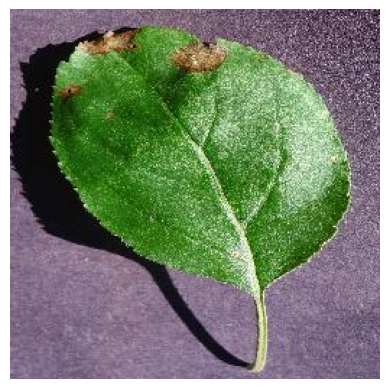

In [ ]:
img_path = '/content/plantvillage dataset/color/Apple___Black_rot/d240fec5-9b1e-4b36-a7df-d0007d0ebfcb___JR_FrgE.S 2929.JPG'
img = mpimg.imread(img_path)
print(img.shape)
print(img)
plt.imshow(img)
plt.axis('off')
plt.show()

In [ ]:
# image parameters :
img_size = 224
batch_size = 32
# it represents the number of samples used in one forward and backward pass through the network and has a direct impact on the accuracy and computational efficiency of the training process.

In [ ]:
# train test split

# Image Data Generators
data_gen = ImageDataGenerator(
    # rescaling our images to make them standardized and have a better accuracy
    rescale=1./255,
    validation_split=0.2  # Use 20% of data for validation
)


In [ ]:
base_dir = '/content/plantvillage dataset/color'
# Train Generator
train_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size , img_size),
    batch_size=batch_size,
    subset='training',
    class_mode='categorical'
)


Found 43456 images belonging to 38 classes.


In [ ]:
# Validation Generator
validation_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='validation',
    class_mode='categorical'
)


Found 10849 images belonging to 38 classes.


In [ ]:
# Building the convolutional Neural Network

# Model Definition
model = models.Sequential()
# (3,3)=kernel
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))


model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(train_generator.num_classes, activation='softmax'))

In [ ]:

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 186624)            0         
                                                                 
 dense (Dense)               (None, 256)               4

In [ ]:
# Compile the Model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Training the Model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,  # Number of steps per epoch
    epochs=5,  # Number of epochs
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size  # Validation steps
)

Epoch 1/5
1358/1358 [==============================] - 132s 97ms/step - loss: 0.0539 - accuracy: 0.9824 - val_loss: 0.7044 - val_accuracy: 0.8618
Epoch 2/5
1358/1358 [==============================] - 112s 83ms/step - loss: 0.0460 - accuracy: 0.9860 - val_loss: 0.6965 - val_accuracy: 0.8750
Epoch 3/5
1358/1358 [==============================] - 119s 88ms/step - loss: 0.0436 - accuracy: 0.9870 - val_loss: 0.6896 - val_accuracy: 0.8785
Epoch 4/5
1358/1358 [==============================] - 112s 82ms/step - loss: 0.0374 - accuracy: 0.9888 - val_loss: 0.8202 - val_accuracy: 0.8556
Epoch 5/5
1358/1358 [==============================] - 108s 80ms/step - loss: 0.0300 - accuracy: 0.9907 - val_loss: 0.9203 - val_accuracy: 0.8592


In [ ]:
# Model Evaluation
print("Evaluating model...")
val_loss, val_accuracy = model.evaluate(validation_generator, steps=validation_generator.samples // batch_size)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

In [ ]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
# Function to Load and Preprocess the Image using Pillow
def load_and_preprocess_image(image_path, target_size=(224, 224)):
    # Load the image
    img = Image.open(image_path)
    # Resize the image
    img = img.resize(target_size)
    # Convert the image to a numpy array
    img_array = np.array(img)
    # Add batch dimension
    img_array = np.expand_dims(img_array, axis=0)
    # Scale the image values to [0, 1]
    img_array = img_array.astype('float32') / 255.
    return img_array

# Function to Predict the Class of an Image
def predict_image_class(model, image_path, class_indices):
    preprocessed_img = load_and_preprocess_image(image_path)
    predictions = model.predict(preprocessed_img)
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    predicted_class_name = class_indices[predicted_class_index]
    return predicted_class_name

In [ ]:
# Create a mapping from class indices to class names
class_indices = {v: k for k, v in train_generator.class_indices.items()}

In [ ]:
class_indices

In [ ]:
# saving the class names as json file
json.dump(class_indices, open('class_indices.json', 'w'))

In [ ]:
# Example Usage
image_path = '/content/apple_black_rot.jpg'
#image_path = '/content/blue_berry_healthy_img.jpg'
#image_path = '/content/test_potato_early_blight.jpg'
predicted_class_name = predict_image_class(model, image_path, class_indices)

# Output the result
print("Predicted Class Name:", predicted_class_name)

In [ ]:
model.save('drive/MyDrive/Colab Notebooks/plant_disease_prediction_model.h5')

In [ ]:

model.save('plant_disease_prediction_model.h5')